Data management

project 2

Xing Zhang G37080319

Aida Roxas G46240167


# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

In [1]:
!wget https://data.wprdc.org/datastore/dump/c0fcc09a-7ddc-4f79-a4c1-9542301ef9dd

--2016-11-11 15:28:53--  https://data.wprdc.org/datastore/dump/c0fcc09a-7ddc-4f79-a4c1-9542301ef9dd
Resolving data.wprdc.org (data.wprdc.org)... 136.142.88.59
Connecting to data.wprdc.org (data.wprdc.org)|136.142.88.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14724786 (14M) [text/csv]
Saving to: ‘c0fcc09a-7ddc-4f79-a4c1-9542301ef9dd’

c0fcc09a-7ddc-4f79- 100%[=====================>]  14.04M  38.6MB/s   in 0.4s   

2016-11-11 15:29:00 (38.6 MB/s) - ‘c0fcc09a-7ddc-4f79-a4c1-9542301ef9dd’ saved [14724786/14724786]



In [2]:
!mv c0fcc09a-7ddc-4f79-a4c1-9542301ef9dd mydata.csv

In [3]:
!wc -l mydata.csv

118611 mydata.csv


First, let's first check how many the columns in the data set, and what are their names.

In [4]:
!csvcut -n mydata.csv

  1: _id
  2: REPORT_NAME
  3: CCR
  4: SECTION
  5: DESCRIPTION
  6: ARREST_TIME
  7: ADDRESS
  8: NEIGHBORHOOD
  9: ZONE
 10: AGE
 11: GENDER


Let's check the summary of each column's data

In [5]:
!csvstat mydata.csv

  1. _id
	<class 'int'>
	Nulls: False
	Min: 1
	Max: 118610
	Sum: 7034225355
	Mean: 59305.5
	Median: 59305.5
	Standard Deviation: 34239.75771307385
	Unique values: 118610
  2. REPORT_NAME
	<class 'str'>
	Nulls: True
	Values: ARREST, OFFENSE 2.0
  3. CCR
	<class 'int'>
	Nulls: False
	Min: 10161970
	Max: 16845890
	Sum: 1850360242209
	Mean: 15600373.005724644
	Median: 15242178.0
	Standard Deviation: 503807.6520371966
	Unique values: 56094
	5 most frequent values:
		16107722:	64
		16073458:	62
		15150094:	60
		16108572:	52
		15092372:	49
  4. SECTION
	<class 'str'>
	Nulls: False
	Unique values: 541
	5 most frequent values:
		3304:	5644
		2701:	5279
		13(a)(16):	4824
		13(a)(32):	3797
		9999:	3781
	Max length: 19
  5. DESCRIPTION
	<class 'str'>
	Nulls: False
	Unique values: 1575
	5 most frequent values:
		Criminal Mischief.:	5637
		Simple Assault.:	5279
		Possession of Controlled Substance:	4824
		Paraphernalia - Use or Possession:	3797
		Theft by Unlawful Taking or Disposition.:	3475
	Max l

###### What do all the columns mean? 


    _id INTEGER: the unique ID of each crime case that heppened
    REPORT_NAME : the reported name of each crime case that happened
    CCR INTEGER: Central Control Record number for each crime
    SECTION : the section that contians the Pennsylvania Crimes     Code for each crime
    DESCRIPTION : the description of each crime happened
    ARREST_TIME : the date of crimnal get arrested
    ZONE : the zone number/id of each area that each crime happened
    ADDRESS : the address of each crime that happened
    NEIGHBORHOOD : the neighborhood that each crime that happened
    AGE : the age of each crimal in each crime case that happened
    GENDER : the gender of each crimal in each crime case that happened
    
### Are there null values? 
Yes, there are couple of varibables that have null values, which are:
REPORT_NAME,
ADDRESS,
NEIGHBORHOOD,
ZONE,
AGE,
GENDER,

#### Which columns interest you the most? 

ADDRESS,TIME, DESCRIPTION,

#### Which columns present some complications or questions you would like to ask?

 What are the top 10 resaons (descriptions) that happened most?
 
 What are the top 10 places  that the crimes happened at most?
 
 What are months that the crimes happened in most?


## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

In [6]:
%reload_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [8]:
!createdb -U dbuser pro2

In [9]:
%sql postgresql://dbuser@localhost:5432/pro2

'Connected: dbuser@pro2'

First, let's loaded the data and create a mydata table which contain all the columns, () after the VARCHAR is the max length of the each data set.

In [10]:
%%sql
DROP TABLE IF EXISTS mydata;
CREATE TABLE mydata
(
    id INTEGER,
    REPORT_NAME VARCHAR(11),
    CCR INTEGER,
    SECTION VARCHAR(19),
    DESCRIPTION VARCHAR(128),
    ARREST_TIME TIMESTAMP,
    ADDRESS VARCHAR(53), 
    NEIGHBORHOOD VARCHAR(27),
    ZONE INTEGER, 
    AGE INTEGER, 
    GENDER VARCHAR(4)
)

Done.
Done.


[]

In [11]:
!pwd

/home/jovyan/work


In [12]:
%%sql
COPY mydata FROM '/home/jovyan/work/mydata.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

118610 rows affected.


[]

Here, we run a COUNT(*) query to verify that all the data has loaded correctly, as we can see, both output shows 118610 rows at this moment from the source website.

In [13]:
%%sql
SELECT COUNT(*) FROM mydata;

1 rows affected.


count
118610


Here, the graph provides a overview of the column name, data type, max character length and if it is nullable. 

In [14]:
%%sql
SELECT column_name, data_type, character_maximum_length, is_nullable
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'mydata';

11 rows affected.


column_name,data_type,character_maximum_length,is_nullable
id,integer,None,YES
report_name,character varying,11,YES
ccr,integer,None,YES
section,character varying,19,YES
description,character varying,128,YES
arrest_time,timestamp without time zone,None,YES
address,character varying,53,YES
neighborhood,character varying,27,YES
zone,integer,None,YES
age,integer,None,YES


Now, we try to find out the top 10  descriptions that crimes happened most , and we draw a graph to look at it visually. We can see that criminal mischief is the description that crimes had most.

In [15]:
%%sql
SELECT DISTINCT DESCRIPTION, COUNT(*) AS count
FROM mydata
GROUP BY DESCRIPTION
ORDER BY count DESC
LIMIT 10;

10 rows affected.


description,count
Criminal Mischief.,5637
Simple Assault.,5279
Possession of Controlled Substance,4824
Paraphernalia - Use or Possession,3797
Theft by Unlawful Taking or Disposition.,3475
Burglary.,3471
Accidents Involving Damage to Unattended Veh.or Prop.,3295
Theft from Vehicle,3224
Aggravated Assault.,2854
Bench Warrant,2744


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 10 artists>

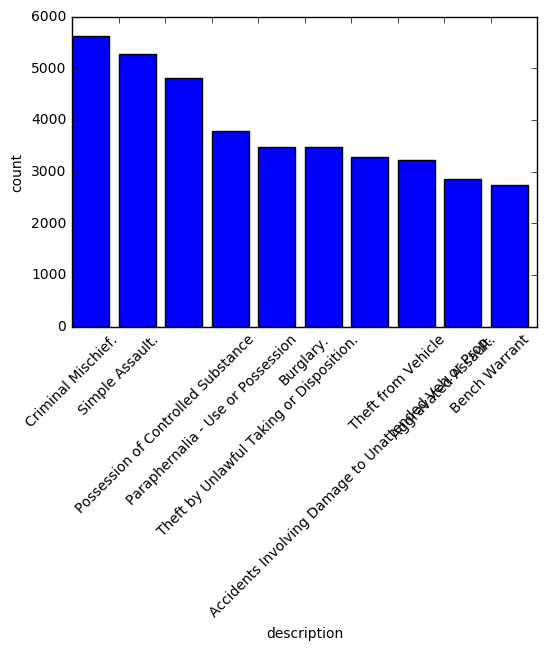

In [16]:
%matplotlib inline
result = _
result.bar()

Now, we try to find out the top 10 neighborhoods  that crime happened in most , as we can see golden triangle is the neighborhood that crime happened most.

In [17]:
%%sql
SELECT DISTINCT neighborhood, COUNT(*) AS count
FROM mydata
GROUP BY neighborhood
ORDER BY count DESC
LIMIT 10;

10 rows affected.


neighborhood,count
Golden Triangle/Civic Arena,8229
South Side Flats,7692
East Allegheny,3538
East Liberty,3529
Carrick,3422
Brighton Heights,2711
Bluff,2605
Sheraden,2577
Marshall-Shadeland,2534
Mount Washington,2523


Here, we take out the month fromthe arrest_time data set, and then draw a histogram for the frequence of months that we get from arrest_time, and from the graph, we can tell that month 7,8,9 are the three months that crimes happened in most.

In [18]:
%%sql
SELECT TO_CHAR(ARREST_TIME, 'MM') AS month, COUNT(*) as count
FROM mydata
GROUP BY month
ORDER BY month

12 rows affected.


month,count
01,5839
02,5619
03,9112
04,10304
05,11908
06,12365
07,12732
08,13469
09,12004
10,11862


<Container object of 12 artists>

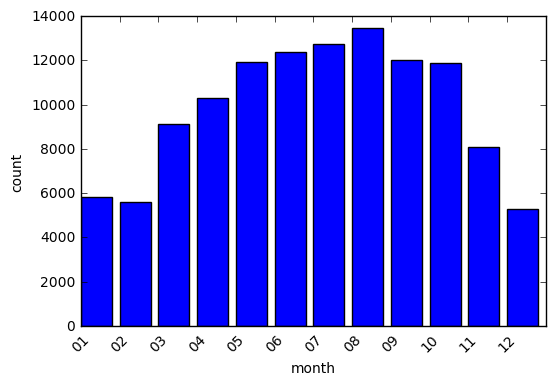

In [19]:
%matplotlib inline
result = _
result.bar()

Here, we select the year from the arrest time, we can see that we only have data for year 15 and 16, we can see that the total number of crimes in 16 is slightly less than the number happen in 15, which is a good news!

In [20]:
%%sql
SELECT TO_CHAR(ARREST_TIME, 'YY') AS year, COUNT(*) as count
FROM mydata
GROUP BY year
ORDER BY year

2 rows affected.


year,count
15,59803
16,58807


<Container object of 2 artists>

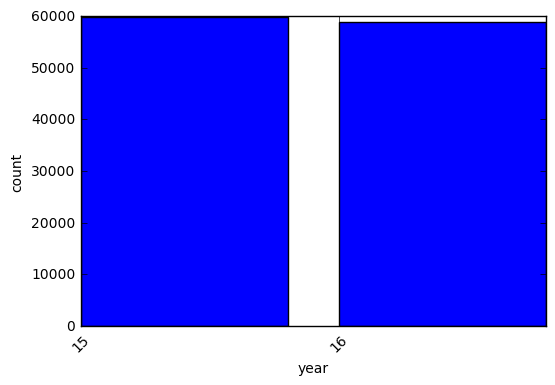

In [21]:
%matplotlib inline
result = _
result.bar()

Now, we try to do the data cleaning step, lets create a table named clean_data, in this table, we know "id" (crime report id for each crime record) is not null. and we try to imputes values for null cells to avoid null values. "-999" is for the themes/cells that only have integer nulls. 

In [22]:
%%sql
DROP TABLE IF EXISTS clean_data;
CREATE TABLE clean_data AS( 
SELECT *
FROM mydata 
WHERE  id is not null)
;

Done.
118610 rows affected.


[]

Here, the output also matches the result that we get from q1, "Are there null values?" and the answer in Q1 is "YES, they are: REPORT_NAME, ADDRESS, NEIGHBORHOOD, ZONE, AGE, GENDER".

In [23]:
%%sql   
UPDATE clean_data SET REPORT_NAME = 'Null' where REPORT_NAME is null;
UPDATE clean_data SET ADDRESS = 'Null' where ADDRESS is null;
UPDATE clean_data SET NEIGHBORHOOD = 'Null' where NEIGHBORHOOD is null;
UPDATE clean_data SET ZONE = -999 where ZONE is null;
UPDATE clean_data SET AGE = -999 where AGE is null;
UPDATE clean_data SET GENDER = 'Null' where GENDER is null;
UPDATE clean_data SET CCR = -999 where CCR is null;
UPDATE clean_data SET SECTION = 'Null' where SECTION is null;
UPDATE clean_data SET DESCRIPTION = 'Null' where DESCRIPTION is null;





44016 rows affected.
1 rows affected.
1 rows affected.
545 rows affected.
79253 rows affected.
78728 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.


[]

## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

In [24]:
!pwd

/home/jovyan/work


In this part, I created a fact table,which is called "crimefact",and two dimensions table, one is called location_dim and the other one is called description_dim. Location dimension contains location_id(primary key), address, zone, and neighberhood. Description dimension contains description_id(primary key) and description First, let's look at the fact table and dimension tables in a picture.

In [25]:
from IPython.display import Image
PATH = "/home/jovyan/work/"

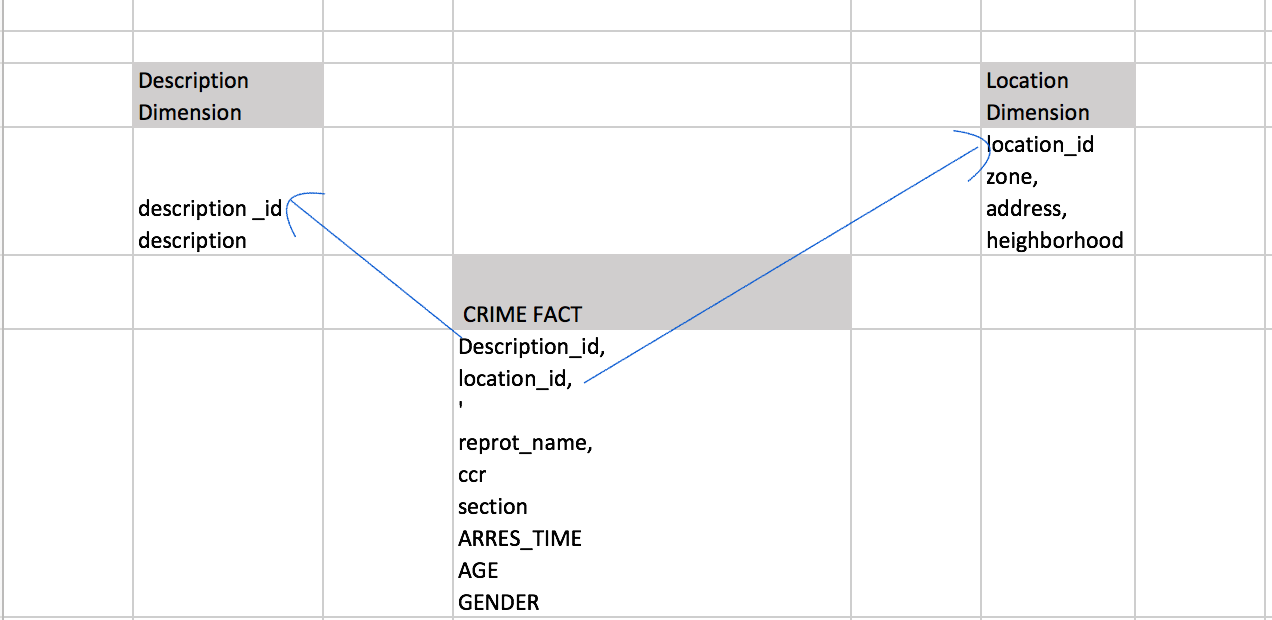

In [26]:
Image(filename = PATH + "table.png", width=1000, height=1000)

Here, we creat the location dimention which has location_id as primary key and contains zone, address and neighborhood.

In [27]:
%%sql
DROP TABLE IF EXISTS location_dim CASCADE;
CREATE TABLE location_dim (
  location_id SERIAL PRIMARY KEY,
  ZONE INTEGER DEFAULT NULL, 
  ADDRESS VARCHAR(53) DEFAULT NULL, 
  NEIGHBORHOOD VARCHAR(27) DEFAULT NULL 
    
);

Done.
Done.


[]

Then we insert ZONE, ADDRESS, HEIGHBORHOOD information from the data table that we already cleaned.

In [28]:
%%sql
INSERT INTO location_dim (ZONE, ADDRESS, NEIGHBORHOOD)
SELECT 
    ZONE, 
    ADDRESS,
    NEIGHBORHOOD 
from clean_data
;

118610 rows affected.


[]

See sample output for the location dimension table below.

In [29]:
%%sql
select * from location_dim limit 10;

10 rows affected.


location_id,zone,address,neighborhood
1,3,100 block Jucunda St,Knoxville
2,3,100 block Jucunda St,Knoxville
3,3,100 block Jucunda St,Knoxville
4,3,400 block Orchard Pl,Knoxville
5,3,400 block Orchard Pl,Knoxville
6,3,400 block Orchard Pl,Knoxville
7,3,400 block Orchard Pl,Knoxville
8,3,Brownsville Rd & Calhoun Ave,Carrick
9,3,Brownsville Rd & Calhoun Ave,Carrick
10,3,Brownsville Rd & Calhoun Ave,Carrick


Here, we creat the description dimention which has description_id as primary key and contains description.

In [30]:
%%sql
DROP TABLE IF EXISTS description_dim;
CREATE TABLE description_dim (
  description_id SERIAL PRIMARY KEY,
  DESCRIPTION VARCHAR(128) 
    
);

Done.
Done.


[]

In [31]:
%%sql
INSERT INTO description_dim (DESCRIPTION)
SELECT 
    DESCRIPTION
from clean_data
;

118610 rows affected.


[]

See sample output for the location dimension table below.

In [32]:
%%sql
select * from description_dim limit 10;

10 rows affected.


description_id,description
1,Public Drunkenness
2,Criminal Trespass
3,Criminal Mischief.
4,Actual Communication
5,Ethnic Intimidation.
6,CRIMINAL MISCHIEF - Intentionally Damages Real Or Personal Property Of Another
7,Stalking
8,Possession of Controlled Substance
9,Paraphernalia - Use or Possession
10,Possession of Controlled Substance


Now, we create the fact table named as "crimefact", which contains the two primary keys from the two dimentions, and other themes.

In [33]:
%%sql
DROP TABLE IF EXISTS crimefact;
CREATE TABLE crimefact
(

    location_id SERIAL NOT NULL ,
    description_id SERIAL NOT NULL,


    report_name varchar(11),
    ccr integer,
    section varchar,
    arrest_time timestamp    
)


Done.
Done.


[]

Here, we tried to connect the location dimention table, description dimention table both to  crimefact table, by using the primary key in each dimention table (location_id and description_id)  and  sent them as FOREIGN KEY, and update it and insert rest of themes into crimetable.

In [34]:
%%sql
INSERT INTO crimefact(report_name,ccr,section,arrest_time)
SELECT report_name,ccr,section,arrest_time
FROM clean_data

118610 rows affected.


[]

In [35]:
%%sql
ALTER TABLE crimefact
ADD CONSTRAINT location_FK FOREIGN KEY (location_id)
REFERENCES location_dim(location_id) ON DELETE NO ACTION



Done.


[]

The following code works just fine sometimes, but also Sometimes, the following code shows that "the relation already exits", then you need to restart the notebook again, however, no matter what happen, it does not effect the code and result that we have in the following questions.

In [36]:
%%sql
ALTER TABLE crimefact
ADD CONSTRAINT location_FK FOREIGN KEY (description_id)
REFERENCES description_dim(description_id) ON DELETE NO ACTION

(psycopg2.ProgrammingError) constraint "location_fk" for relation "crimefact" already exists
 [SQL: 'ALTER TABLE crimefact\nADD CONSTRAINT location_FK FOREIGN KEY (description_id)\nREFERENCES description_dim(description_id) ON DELETE NO ACTION']


Here is how the crimefact looks like right now.

In [37]:
%%sql
SELECT *
FROM crimefact
LIMIT 20

20 rows affected.


location_id,description_id,report_name,ccr,section,arrest_time
1,1,ARREST,15155207,5505,2015-08-18 16:16:00
2,2,ARREST,15155207,3503(a),2015-08-18 16:16:00
3,3,ARREST,15155207,3304,2015-08-18 16:16:00
4,4,ARREST,15153568,3503(b)(1)(i),2015-08-18 17:28:00
5,5,ARREST,15153568,2710,2015-08-18 17:28:00
6,6,ARREST,15153568,3304(a)(5),2015-08-18 17:28:00
7,7,ARREST,15153568,2709(b),2015-08-18 17:28:00
8,8,ARREST,15155324,13(a)(16),2015-08-18 18:07:00
9,9,ARREST,15155324,13(a)(32),2015-08-18 18:07:00
10,10,ARREST,15155324,13(a)(16),2015-08-18 18:07:00


## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

Now we have the new schema, lets explore crimefact table by looking through description dimention first.

In [38]:
%%sql
select *
from crimefact,description_dim
where crimefact.description_id = description_dim.description_id
limit 10 

10 rows affected.


location_id,description_id,report_name,ccr,section,arrest_time,description_id_1,description
1,1,ARREST,15155207,5505,2015-08-18 16:16:00,1,Public Drunkenness
2,2,ARREST,15155207,3503(a),2015-08-18 16:16:00,2,Criminal Trespass
3,3,ARREST,15155207,3304,2015-08-18 16:16:00,3,Criminal Mischief.
4,4,ARREST,15153568,3503(b)(1)(i),2015-08-18 17:28:00,4,Actual Communication
5,5,ARREST,15153568,2710,2015-08-18 17:28:00,5,Ethnic Intimidation.
6,6,ARREST,15153568,3304(a)(5),2015-08-18 17:28:00,6,CRIMINAL MISCHIEF - Intentionally Damages Real Or Personal Property Of Another
7,7,ARREST,15153568,2709(b),2015-08-18 17:28:00,7,Stalking
8,8,ARREST,15155324,13(a)(16),2015-08-18 18:07:00,8,Possession of Controlled Substance
9,9,ARREST,15155324,13(a)(32),2015-08-18 18:07:00,9,Paraphernalia - Use or Possession
10,10,ARREST,15155324,13(a)(16),2015-08-18 18:07:00,10,Possession of Controlled Substance


Here, I try to find out the top 10 description that happened most in the new schema,and actually I realized that we get the same result as what we did in Q2. "Crimianl Mischief" is the description that happened most for all the crimes' record.

In [39]:
%%sql
select count(*),description
from crimefact,description_dim
where crimefact.description_id = description_dim.description_id
group by description
order by count desc
limit 10 

10 rows affected.


count,description
5637,Criminal Mischief.
5279,Simple Assault.
4824,Possession of Controlled Substance
3797,Paraphernalia - Use or Possession
3475,Theft by Unlawful Taking or Disposition.
3471,Burglary.
3295,Accidents Involving Damage to Unattended Veh.or Prop.
3224,Theft from Vehicle
2854,Aggravated Assault.
2744,Bench Warrant


<Container object of 10 artists>

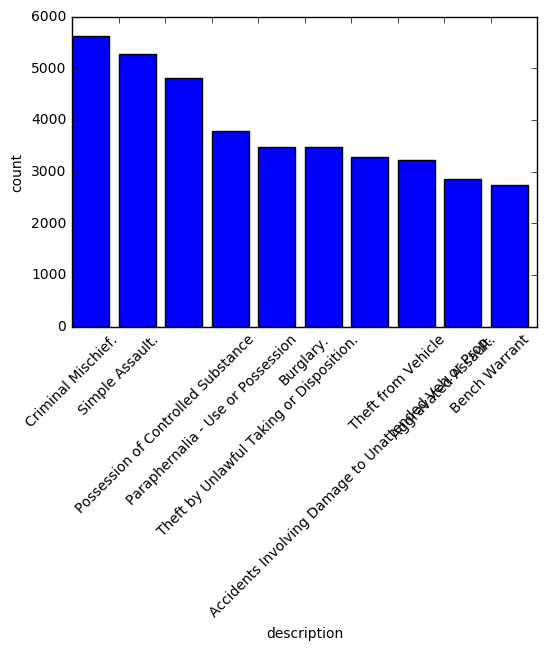

In [40]:
%matplotlib inline
result = _
result.bar()

Now, lets explore the data by looking though the location dimention, and now, the crimefact looks like the following.

In [41]:
%%sql
select *
from crimefact,location_dim
where crimefact.location_id = location_dim.location_id
limit 10 

10 rows affected.


location_id,description_id,report_name,ccr,section,arrest_time,location_id_1,zone,address,neighborhood
1,1,ARREST,15155207,5505,2015-08-18 16:16:00,1,3,100 block Jucunda St,Knoxville
2,2,ARREST,15155207,3503(a),2015-08-18 16:16:00,2,3,100 block Jucunda St,Knoxville
3,3,ARREST,15155207,3304,2015-08-18 16:16:00,3,3,100 block Jucunda St,Knoxville
4,4,ARREST,15153568,3503(b)(1)(i),2015-08-18 17:28:00,4,3,400 block Orchard Pl,Knoxville
5,5,ARREST,15153568,2710,2015-08-18 17:28:00,5,3,400 block Orchard Pl,Knoxville
6,6,ARREST,15153568,3304(a)(5),2015-08-18 17:28:00,6,3,400 block Orchard Pl,Knoxville
7,7,ARREST,15153568,2709(b),2015-08-18 17:28:00,7,3,400 block Orchard Pl,Knoxville
8,8,ARREST,15155324,13(a)(16),2015-08-18 18:07:00,8,3,Brownsville Rd & Calhoun Ave,Carrick
9,9,ARREST,15155324,13(a)(32),2015-08-18 18:07:00,9,3,Brownsville Rd & Calhoun Ave,Carrick
10,10,ARREST,15155324,13(a)(16),2015-08-18 18:07:00,10,3,Brownsville Rd & Calhoun Ave,Carrick


Here, I try to find out the top 10 neighborhood that crimes happened most in  in the new schema. I realized that we still get the same output as what had in Q2! Golden Triangle is the neighbohood which crime happened most!

In [42]:
%%sql
select count(*),neighborhood
from crimefact,location_dim
where crimefact.location_id = location_dim.location_id
group by neighborhood
order by count desc
limit 10 

10 rows affected.


count,neighborhood
8229,Golden Triangle/Civic Arena
7692,South Side Flats
3538,East Allegheny
3529,East Liberty
3422,Carrick
2711,Brighton Heights
2605,Bluff
2577,Sheraden
2534,Marshall-Shadeland
2523,Mount Washington


<Container object of 10 artists>

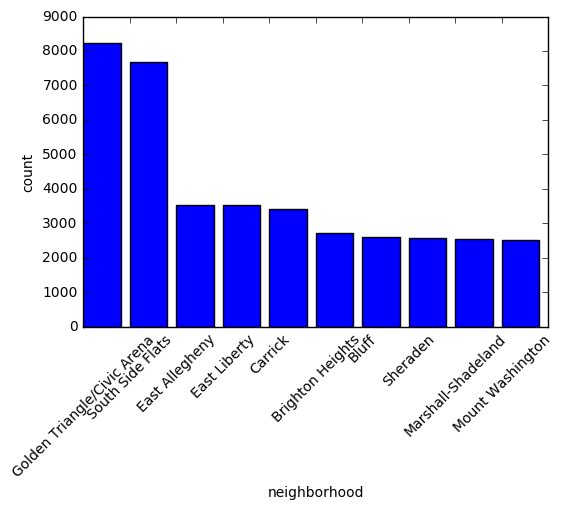

In [43]:
%matplotlib inline
result = _
result.bar()

Now, in the new schema, we try to use join code to find out in what months that crimes happened most, we  take "months" from the "arrest time" and draw a graph, we found out still month 7,8,9 are the three top months that crimes happened most in. Probabaly because during these 3 months, the temperature is very nice, and it during the summer break, which maybe are the reasons that crimes happened more in these 3 months than others.

In [44]:
%%sql
SELECT TO_CHAR(ARREST_TIME, 'MM') AS months, COUNT(*) as count
from crimefact join location_dim on crimefact.location_id = location_dim.location_id 
               join description_dim on crimefact.location_id = description_dim.description_id
GROUP BY months
ORDER BY months

12 rows affected.


months,count
01,5839
02,5619
03,9112
04,10304
05,11908
06,12365
07,12732
08,13469
09,12004
10,11862


<Container object of 12 artists>

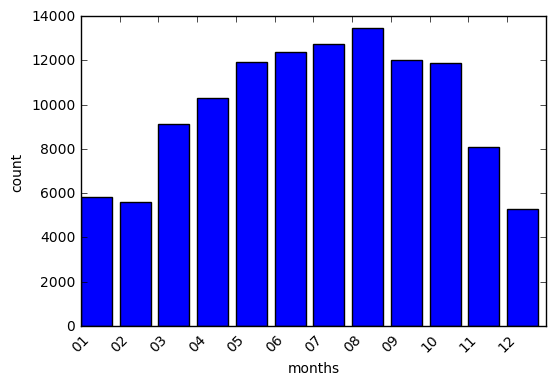

In [45]:
%matplotlib inline
result = _
result.bar()

The outputs are matched with the source data!

By join method, lets find out what is the 10 most Central Control Record number happened most which associated with crime records. We can see that "16107722" is the Central Control Record number that associated with crime recoreds morst, and much more than other Central Control Record number.

In [46]:
%%sql
select ccr, sum(ccr) as Count
from crimefact join location_dim on crimefact.location_id = location_dim.location_id 
               join description_dim on crimefact.location_id = description_dim.description_id
group by ccr
ORDER BY count DESC
LIMIT 10
;

10 rows affected.


ccr,count
16107722,1030894208
16073458,996554396
15150094,909005640
16108572,837645744
15146757,742191093
15092372,739526228
16031412,657287892
16013896,640555840
16062407,626433873
15172344,576549072


<Container object of 10 artists>

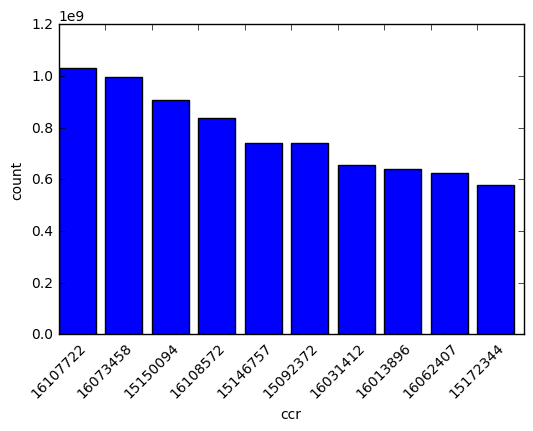

In [47]:
%matplotlib inline
result = _
result.bar()

Here we try to find out in what zone that crimes happened most, and we draw a pie char to see the result more clearly. Zone one is the zone that crimes happened most.

In [48]:
%%sql 
SELECT ZONE, COUNT(*) 
from crimefact,location_dim
where crimefact.location_id = location_dim.location_id
group by ZONE
order by count desc
LIMIT 6;


6 rows affected.


zone,count
1,26277
3,24339
5,20762
2,19580
4,14363
6,12744


([<matplotlib.patches.Wedge at 0x7fa6d04b49b0>,
  <matplotlib.text.Text at 0x7fa6d044df28>])

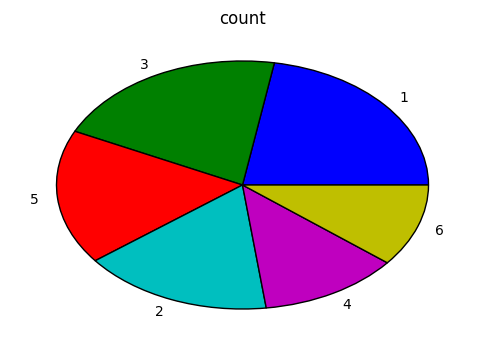

In [49]:
%matplotlib inline
result = _
result.pie()

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.



### ANSWER TO Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.
##### What would it take to automate this process?
To automate the process we will need a user interface where the user can enter csv file name and location. All codes will be written to address a generic filename and location, also, we need to ensure that the each data is valid and  values are correct,avoid to have invalid, dulicated or incorrect values, and we need to do data cleansing to make sure the data quality.



##### How often would you need to update the data?
There is no absolutely stardard for all the data set for this question, however in this data set, since the arrest_time is accurate to year, month, day, hour, minutes and second. Which shows that crimes are happening every seconds. So it is nice to have updated data set as quick as possible for each time unit, however, due to there is a large number of crime that happened for every second, so it is not easy to updated the data set for each second, so we suggest that to update the data once a week or maybe even once a month. Since there is no critical information in the dataset that may suggest that users will need it on a quick turnaround, and the data is only for information use only.

##### Could you easily automate any data cleaning steps?
Yes we did deal with null cells data in Q2 to imputes values for null cells. Quick data cleaning steps are always data integrity verification like checking for nulls and duplicate entries by checking the IDs.

##### What checks would you need to put in place to ensure quality?
There are a couple of checks we can add to ensure the quality of our report. For one, NULLs should not be accepted. We can also reduce the data to a list of acceptable values. This will ensure reports can be generated more uniformly.

#####  Would humans need to be involved, or could you automate it all?
We believe that user input is always valuable. The program should be responsive to the end user to ensure a versatile and adaptive system.


In this project, we work on each question together, Aida more focusd on Q1, and Q2 and Bonus question, Xing more focused on Q3 and Q4, great teamwork!